# BASIC OPERATIONS ON IMAGES

## Accessing and Modifying pixel values

In [1]:
import numpy as np
import cv2

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [2]:
img = cv2.imread('logo.jpg')
px = img[100,100]
print(px)

[ 33  30 253]


In [3]:
# accessing only blue pixel
blue = img[100,100,0]
print(blue)

33


In [4]:
img[100,100] = [0,255,255]
img[100,100]

array([  0, 255, 255], dtype=uint8)

In [5]:
# accessing RED value
img.item(10,10,2)

255

In [6]:
# modifying RED value
img.itemset((10,10,2),100)
print(img.item(10,10,2))

100


## Accessing Image Properties

In [7]:
# returns rows, columns and channels(if image is color)

img.shape

(334, 420, 3)

**Note** - If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to check if loaded image is grayscale or color image. 

In [8]:
# Total number of pixels is accessed by img.size
img.size

420840

In [9]:
img.dtype

dtype('uint8')

**Note** - img.dtype is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.

## Image ROI

Sometimes, you will have to play with certain region of images. For eye detection in images, first face detection is done all over the image and when face is obtained, we select the face region alone and search for eyes inside it instead of searching whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area)

In [12]:
roi = img[180:240, 230:290]
img[173:233, 100:160] = roi

In [13]:
cv2.imshow("image",img)
cv2.waitKey(0)

-1

## Splitting & Merging Image Channels

In [14]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

OR

In [15]:
b = img[:,:,0]

Suppose, you want to make all the red pixels to zero, you need not split like this & put it equal to 0. You can simply use Numpy indexing, and that is more faster.

In [16]:
img[:,:,2] = 0

In [17]:
cv2.imshow('image',img)
cv2.waitKey(0)

-1

# Making borders for Images (Padding)

If you want to create a border around the image, something like a photo frame, you can use cv2.copyMakeBorder() function. But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

* src - input image

* top, bottom, left, right - border width in number of pixels in corresponding directions

* borderType - Flag defining what kind of border to be added. It can be following types:
  * cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
  * cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
  * cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
  * cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
  * cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
  
* value - Color of border if border type is cv2.BORDER_CONSTANT

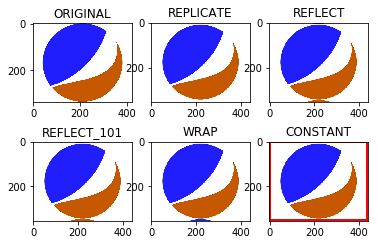

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('logo.jpg')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()